In [1]:
# Standard libray
import sys, os
sys.path.append("..")

# Common library
import numpy as np
import scipy
from pylab import *
import scipy.interpolate

# ROOT>....
import uproot

# Custom helper functions
import MuHelper.muhelper.helper_basic as hp

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
# working_dir = "/mnt/sda2/tofpet_data/function_gen"
working_dir = "/mnt/sda2/tofpet_data/two_preamp"
working_dir = "/mnt/sda2/tofpet_data/test_stand_init/"

# Open coincidence txt file

In [20]:
def read_coinc_txt(filename):
    # 6 columns of time, energy, id, time, energy, id
    data = np.loadtxt(filename,usecols=[2,3,4, 7,8,9])
    return data

# filename = f"{working_dir}/data_coinc_14_coinc.dat"
filename = f"{working_dir}/data/test_layer_4_assembled_coinc.dat"

data = read_coinc_txt(filename)

ids = np.unique(np.concatenate((data[:,2], data[:,5])))
print(ids)

t1 = data[:,0]
e1 = data[:,1]
id1 = data[:,2]

t2 = data[:,3]
e2 = data[:,4]
id2 = data[:,5]

dt = t1-t2
print(id1[0])
print("Number of events:", len(e1))


[ 29.  30.  31.  32.  33.  34.  35.  36.  37.  39. 285. 286. 287. 288.
 289. 290. 291. 292. 293. 295.]
288.0
Number of events: 833452


Text(0.5, 0, 'Energy')

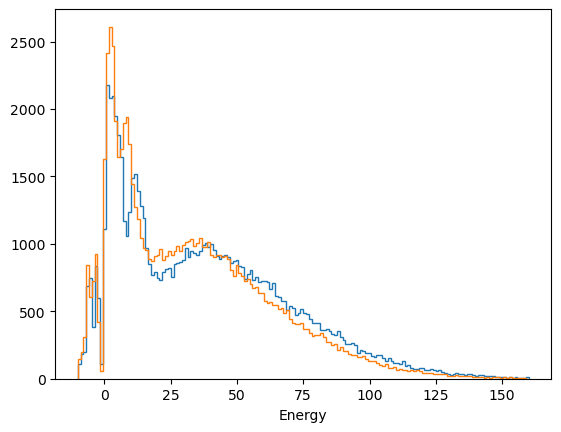

In [28]:
bins=np.linspace(-10,160,161)
ch1=35
ch2=287
mask_coinc =  ((id1==ch1)&(id2==ch2))|((id1==ch2)&(id2==ch1))
mask_e = (e1>22)&(e2>24)

hist(e1[mask_coinc],bins=bins,histtype="step");
hist(e2[mask_coinc],bins=bins,histtype="step");
xlabel("Energy")
# yscale("log")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


32570
[ 25.37505666 126.68455884 107.02070389]


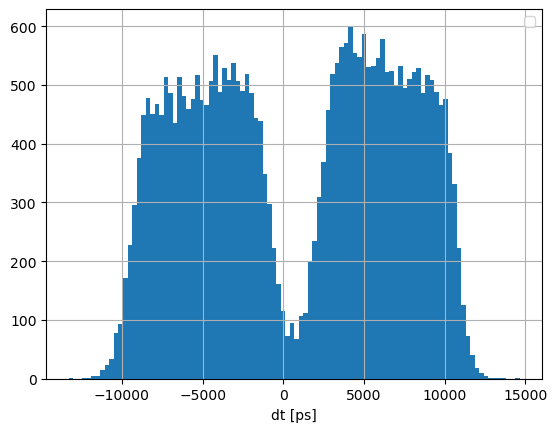

In [30]:
mask = mask_coinc & mask_e; print(sum(mask))


# h=hist(dt[mask]/sqrt(2),bins=100, range=(-6000,6000),histtype="step");
h=hist(dt[mask]/sqrt(2),bins=100);
# popt, pcov, info, f = hp.fit_hist("gauss", h, fit_range=[-2000,4000],label="$\sigma$={popt[2]:.2f} ps", color="C3", linestyle="--");
legend()
xlabel("dt [ps]")
grid()
print(np.sqrt(np.diag(pcov)))

# yscale('log')
# ylim(1,)

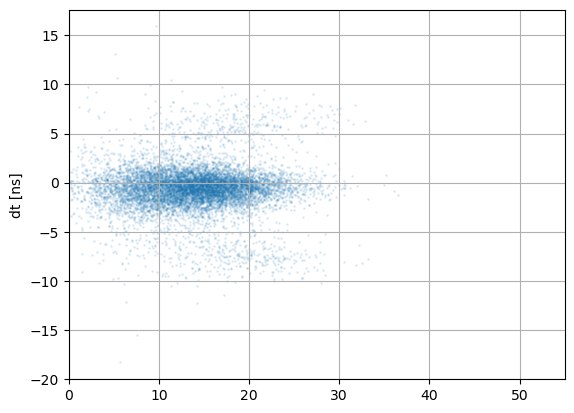

In [10]:
# scatter(e1, dt, s=1)
e = (e1+e2)/2
e = np.mean([e1,e2], axis=0)

scatter(e, dt/1000, s=1, alpha=0.1)
xlim(0,55)
# xlabel("Energy [pe]")
ylabel("dt [ns]")
grid()